In [1]:
#!/usr/bin/env python
#-*- conding:utf-8 -*-
# @AUTHOR: Gui-Yan Xie
# @CONTACT: xieguiyan at hust dot edu dot cn
# @DATE: 2021-11-16 15:31:42
# @DESCRIPTION: 
# @FILE: 01-plot.py
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set()

/home/xiegy/github/EVAtool/venv/lib/python3.6/site-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


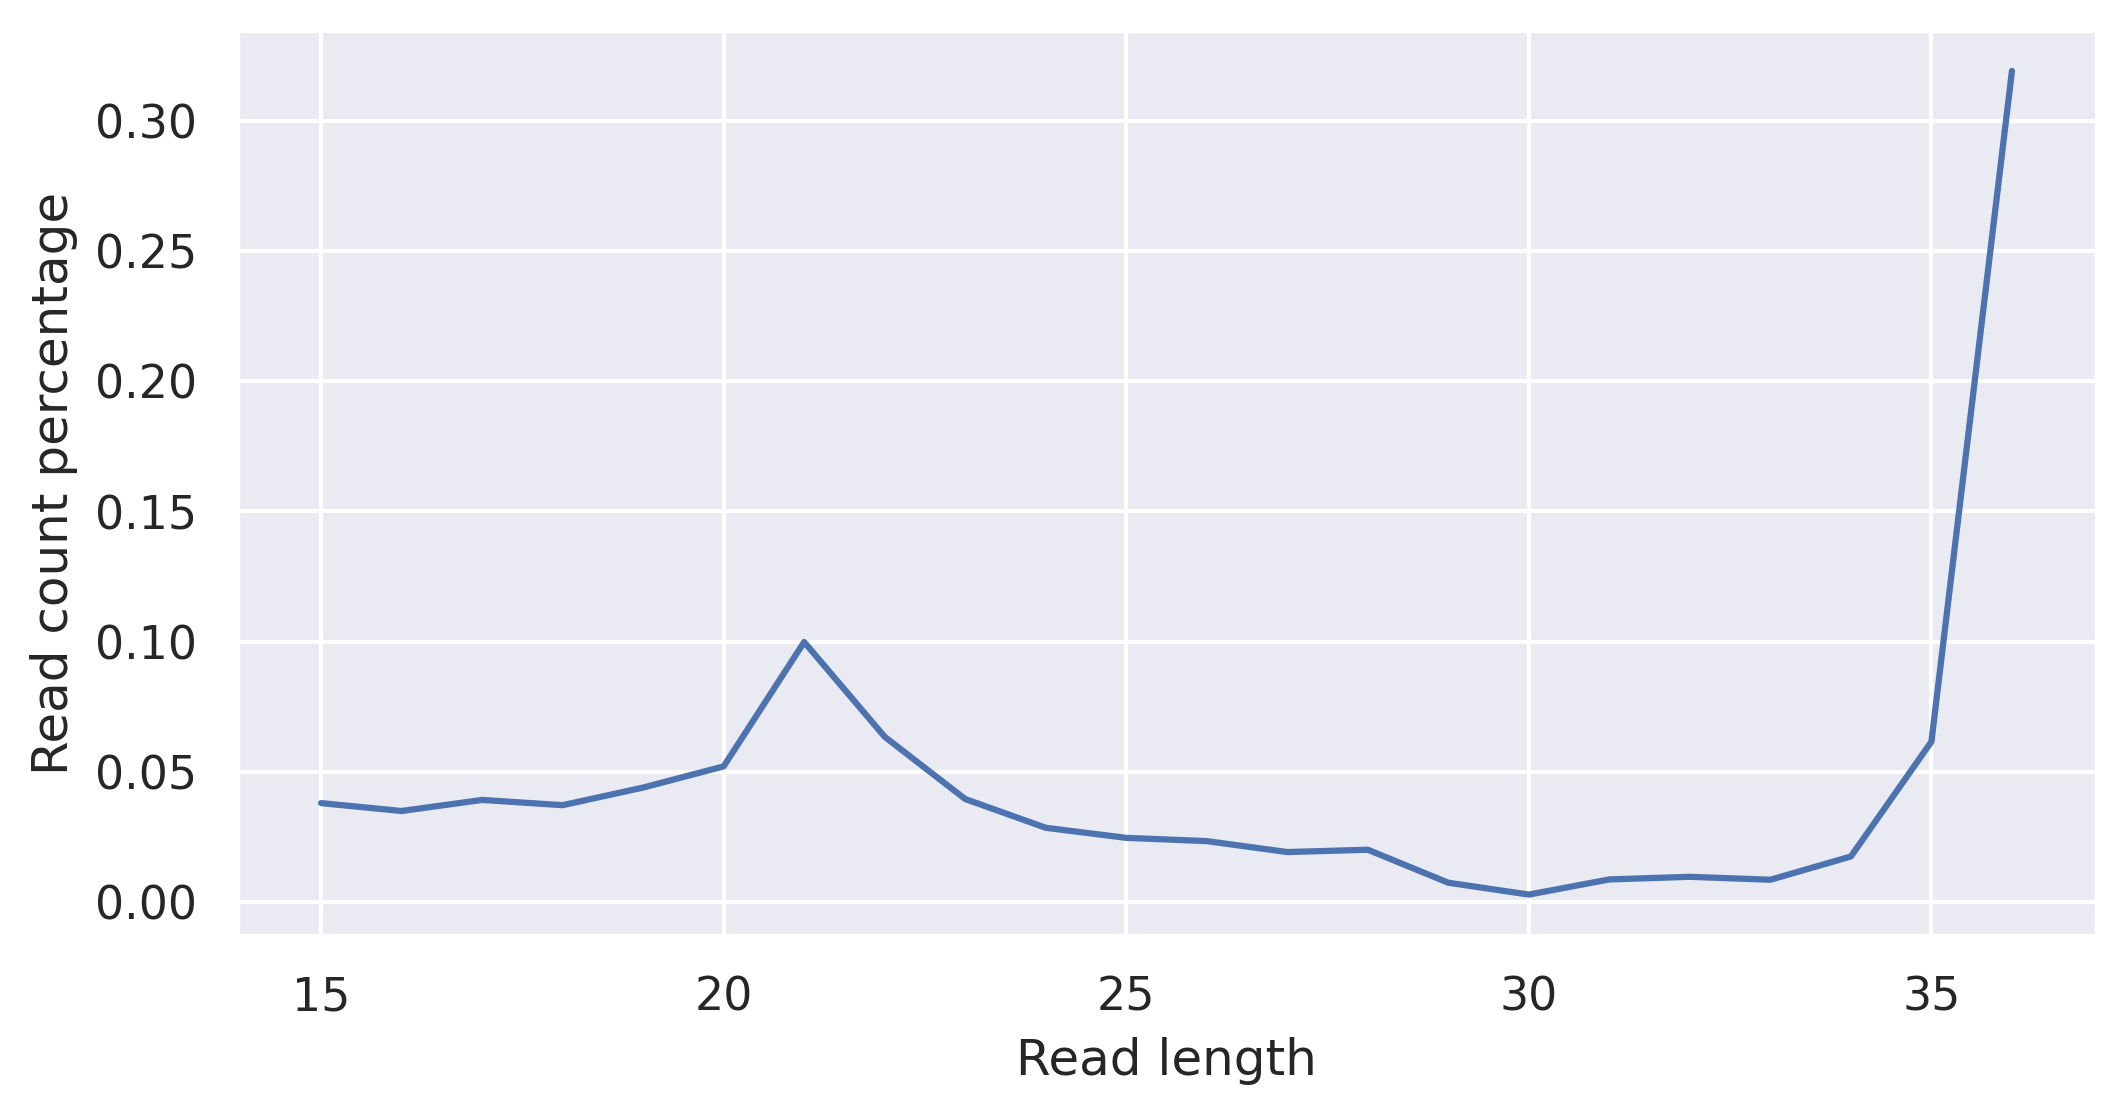

In [11]:
# Reads length distribution
plt.figure(dpi=300, figsize=(8, 4))
read=pd.read_table('../tmp_result/SRR8185773.freq.stat',sep='\t',header=None, skipfooter=1)
read.columns=['Read length','count','Read count percentage']
read_len = sns.lineplot(x='Read length',y='Read count percentage',data=read)

In [3]:
read_len.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test.png')
# read_len.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test.pdf')

In [ ]:
# Read type distribution
plt.figure(dpi=300, figsize=(8, 4))
ncrna_type = pd.read_table('../tmp_result/SRR8185773.stat', header=None, sep='\t',skiprows=4, dtype=str)
ncrna_type.columns = ['Category','MappingTag', 'Ratio']
ncrna_type['Ratio'] = ncrna_type['Ratio'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
read_type =sns.barplot(x='Category',y='Ratio',data=ncrna_type)
read_type.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

In [ ]:
read_type.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test2.png')
# read_type.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/distribution_of_ncRNA_type.pdf')